In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

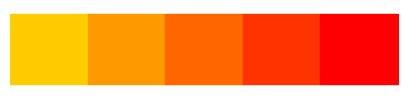

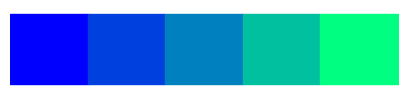

In [2]:
par_dir = "/global/cfs/cdirs/m3246/twamorka/H1Unfold_Vinny/H1Unfold/plots/" #dir for Tanvi's parallel ensembles
N_Ensemble = 5

par_colors = plt.get_cmap('autumn')(np.linspace(0.8, 0, N_Ensemble))
step_colors = plt.get_cmap('winter')(np.linspace(0, 1, N_Ensemble))

plt.figure(figsize=(5, 1))
[plt.fill_between([i, i+1], 0, 1, color=color) for i, color in enumerate(par_colors)]
plt.xlim(0, N_Ensemble)
plt.axis('off')
plt.show()
plt.figure(figsize=(5, 1))
[plt.fill_between([i, i+1], 0, 1, color=color) for i, color in enumerate(step_colors)]
plt.xlim(0, N_Ensemble)
plt.axis('off')
plt.show()

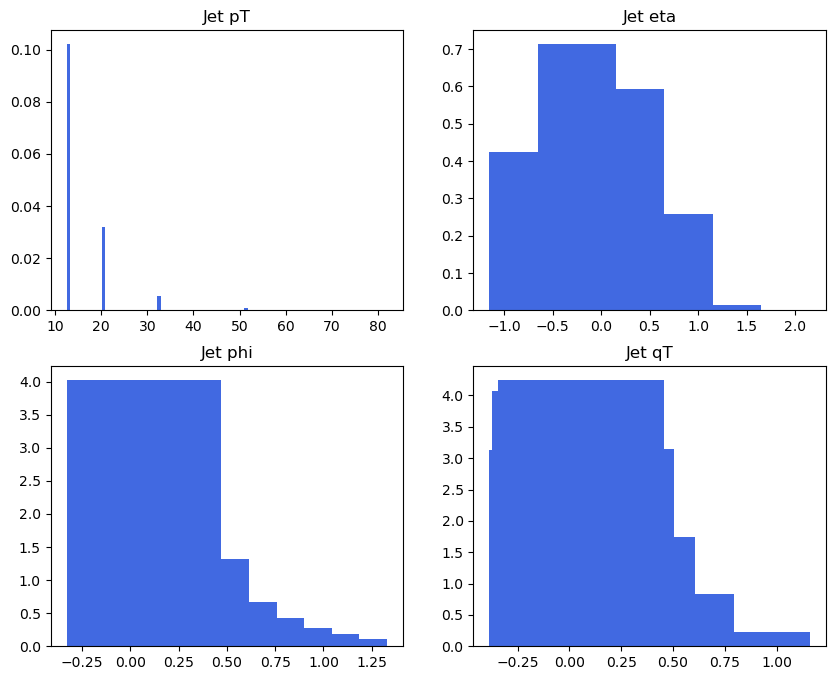

In [3]:
jet_features = ['pT','eta','phi','qT']
fig, axs = plt.subplots(2,2,figsize=(10,8))
axs = axs.ravel()
axs[0].set_title(jet_features[0])


for j,jet_feature in enumerate(jet_features):
    axs[j].set_title(f'Jet {jet_features[j]}')
    jet_files = glob.glob(f'Rapgap_unfolded*jet_{jet_features[j]}*plot_vals.npy')
    for jet_file in jet_files:
        jet_data = np.load(jet_file)
        axs[j].bar(jet_data[0],jet_data[1],color='royalblue')

In [13]:
def get_stdv_from_files(files, truth='None'):

    data = [np.load(file) for file in files]
    
    # Initialize a dictionary to hold lists of y-values for each x-value index
    y_values_per_x_index = {}
    ratio_values_per_x_index = {}
    x_values = np.load(files[0])[0]  # Load the x-values from the first file


    if truth is None:
        for single_file_data in data:
            for i, y in enumerate(single_file_data[1]):  # single_file_data[1] are the y-values
                if i not in y_values_per_x_index:
                    y_values_per_x_index[i] = []
                y_values_per_x_index[i].append(y)
        
            for i, r in enumerate(single_file_data[2]):  # single_file_data[1] are the y-values
                if i not in ratio_values_per_x_index:
                    ratio_values_per_x_index[i] = []
                ratio_values_per_x_index[i].append(r)
                
        
        std_devs = [np.std(y_values) for y_values in y_values_per_x_index.values()]
        ratio_std_devs = [np.std(y_values) for y_values in ratio_values_per_x_index.values()]

    return x_values, std_devs, ratio_std_devs

## Jets

In [14]:
jet_features = ['jet_pT', 'jet_eta', 'jet_phi', 'jet_qT']
feature_labels = [r'$p_\mathrm{T}^\mathrm{jet}$',r'$\eta^\mathrm{jet}$',
                  r'$\Delta\phi^\mathrm{jet}$',r'$q_\mathrm{T}^\mathrm{jet}$']

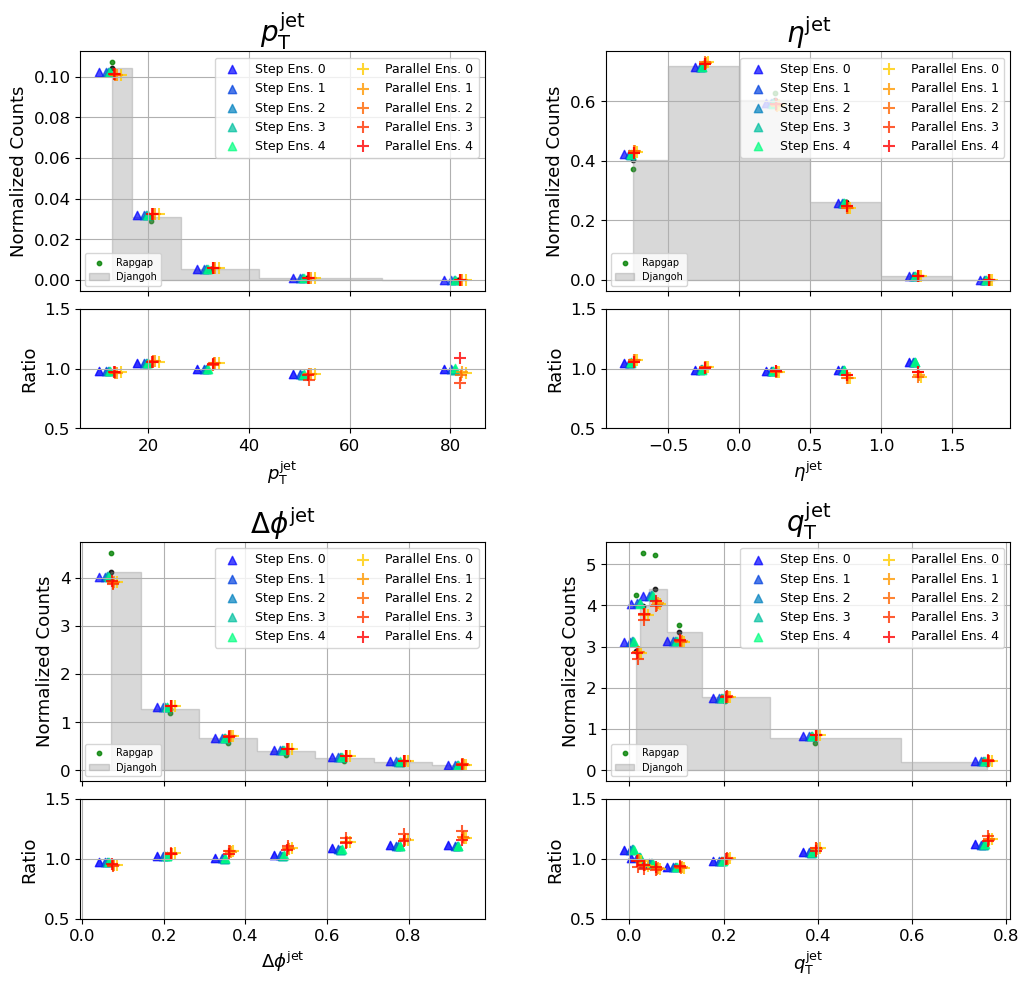

In [15]:
#Plot Distributions
fig = plt.figure(figsize=(12, 24))
outer_gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.3, wspace=0.3) #4rows, 2cols
alpha = 0.8

for j,jet_feature in enumerate(jet_features):
    
    gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[j], height_ratios=[2, 1], hspace=0.1)

    rapgap = np.load(f'Rapgap{jet_feature}_ens0_plot_vals.npy')
    djangoh = np.load(f'Djangoh{jet_feature}_ens0_plot_vals.npy')

    # Define the subplots; top plot takes up 3 parts, bottom plot takes up 1 part
    ax1 = fig.add_subplot(gs[:1, 0])  # This is the top subplot
    ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)   # This is the bottom subplot
    
    r_scatter = ax1.scatter(rapgap[0], rapgap[1], marker='o', linestyle='-',label='Rapgap',alpha=alpha,s=10,color='g')
    d_scatter = ax1.fill_between(djangoh[0], djangoh[1], step='mid', color='gray', alpha=0.3,label='Djangoh')
    
    first_legend = ax1.legend(handles=[r_scatter, d_scatter],loc='lower left',fontsize=7)
    ax1.add_artist(first_legend)

    
    ax1.set_title(f'{feature_labels[j]}',fontsize=20)
    ax1.set_ylabel('Normalized Counts',fontsize=13)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.grid(True)
    plt.setp(ax1.get_xticklabels(), visible=False)

    #ax2.scatter(rapgap[0], rapgap[2], marker='o', linestyle='-',label='Rapgap',alpha=0.5)
    #ax2.scatter(rapgap[0], djangoh[2], marker='o', linestyle='-',label='Djangoh',alpha=0.5)
    ax2.set_ylabel(r'Ratio',fontsize=13)
    ax2.set_xlabel(f'{feature_labels[j]}',fontsize=13)
    ax2.set_ylim(0.5,1.5)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    ax2.grid(True)

    handles = []

    for n in range(N_Ensemble):
        step_data = np.load(f'Rapgap_unfolded{n}{jet_feature}_ens{n}_plot_vals.npy')        
        step_shift = max(step_data[0])/len(step_data)/10/(n+1)
        handles.append(ax1.scatter(step_data[0]-step_shift, step_data[1], marker='^', color=step_colors[n], alpha=alpha-0.1, linestyle='-',label=f'Step Ens. {n}'))
        ax2.scatter(step_data[0]-step_shift, step_data[2], marker='^', color=step_colors[n], alpha=alpha, linestyle='-',label=f'Step Ens. {n}')

    for n in range(N_Ensemble):
        par_data = np.load(f'{par_dir}/Rapgap_unfolded{n}{jet_feature}_ens{n}_plot_vals.npy')
        par_shift = max(par_data[0])/len(par_data[0])/10/(n+1)
        handles.append(ax1.scatter(par_data[0]+par_shift, par_data[1], marker='+',s=80, color=par_colors[n], alpha=alpha, linestyle='-',label=f'Parallel Ens. {n}'))
        ax2.scatter(par_data[0]+par_shift, par_data[2], marker='+', s=80, color = par_colors[n], alpha=alpha, linestyle='-',label=f'Parallel Ens. {n}')


    ax1.legend(handles=handles,ncol=2,fontsize=9)



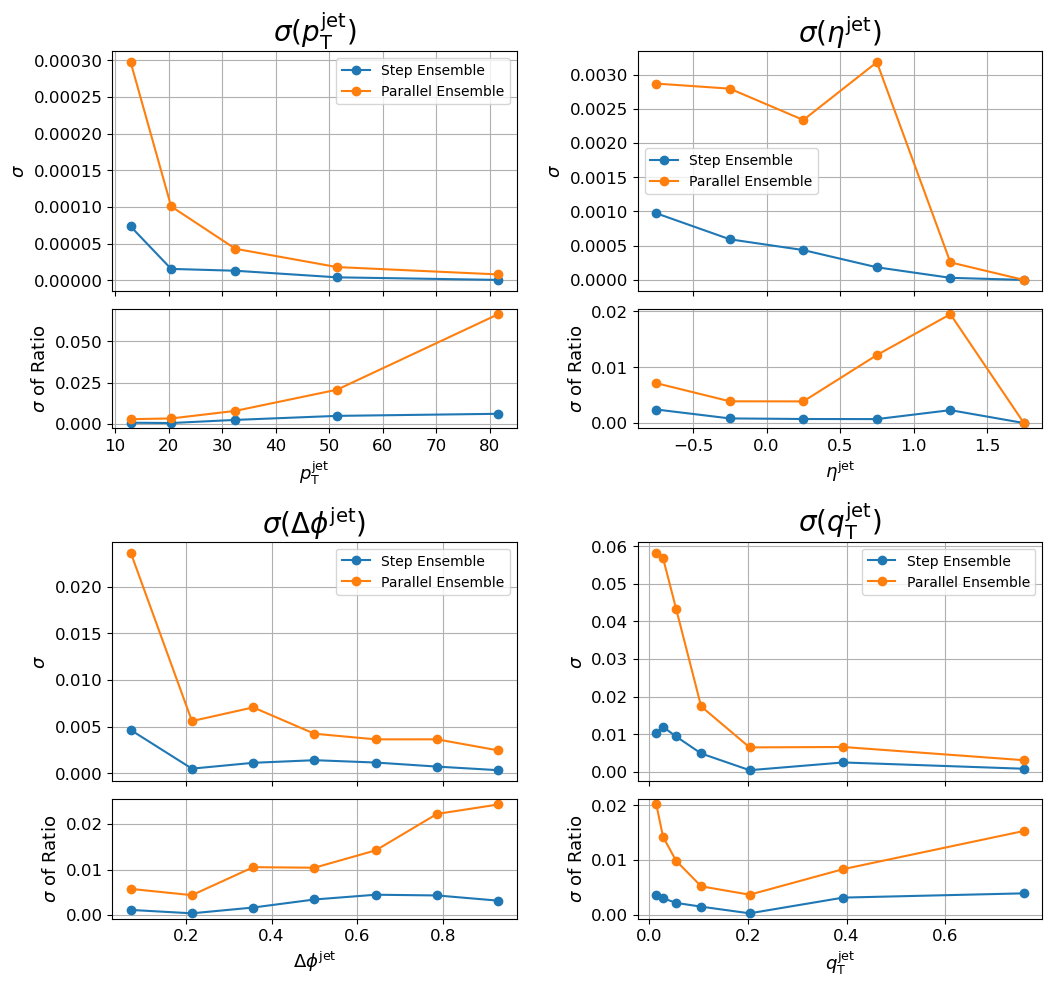

In [16]:
#Plot Standard Deviations
fig = plt.figure(figsize=(12, 24))
outer_gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.3, wspace=0.3) #4rows, 2cols

for j,jet_feature in enumerate(jet_features):
    
    gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[j], height_ratios=[2, 1], hspace=0.1)

    step_files = glob.glob(f'Rapgap_unfolded[0-4]{jet_feature}_ens[0-4]_plot_vals.npy')
    parr_files = glob.glob(f'{par_dir}/Rapgap_unfolded[0-4]{jet_feature}_ens[0-4]_plot_vals.npy')    

    x_values, std_devs, ratio_std_devs = get_stdv_from_files(step_files)
    parr_x, parr_std, parr_ratio = get_stdv_from_files(parr_files)
    
    # Define the subplots; top plot takes up 3 parts, bottom plot takes up 1 part
    ax1 = fig.add_subplot(gs[:1, 0])  # This is the top subplot
    ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)   # This is the bottom subplot
    
    ax1.plot(x_values, std_devs, marker='o', linestyle='-',label='Step Ensemble')
    ax1.plot(parr_x, parr_std, marker='o', linestyle='-',label='Parallel Ensemble')
    ax1.set_title(f'$\sigma$({feature_labels[j]})',fontsize=20)
    ax1.set_ylabel('$\sigma$',fontsize=13)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend()
    ax1.grid(True)
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2.plot(x_values, ratio_std_devs, marker='o', linestyle='-',label='Step Ensemble')
    ax2.plot(parr_x, parr_ratio, marker='o', linestyle='-',label='Parallel Ensemble')
    ax2.set_ylabel(r'$\sigma$ of Ratio',fontsize=13)
    ax2.set_xlabel(f'{feature_labels[j]}',fontsize=13)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    ax2.grid(True)


# Events

In [17]:
event_labels = [r'$\log_{10}(Q^2)$',r'$y$',r'$e_{p\mathrm{T}}/Q$',r'$e_\eta$',r'$e_\phi$']

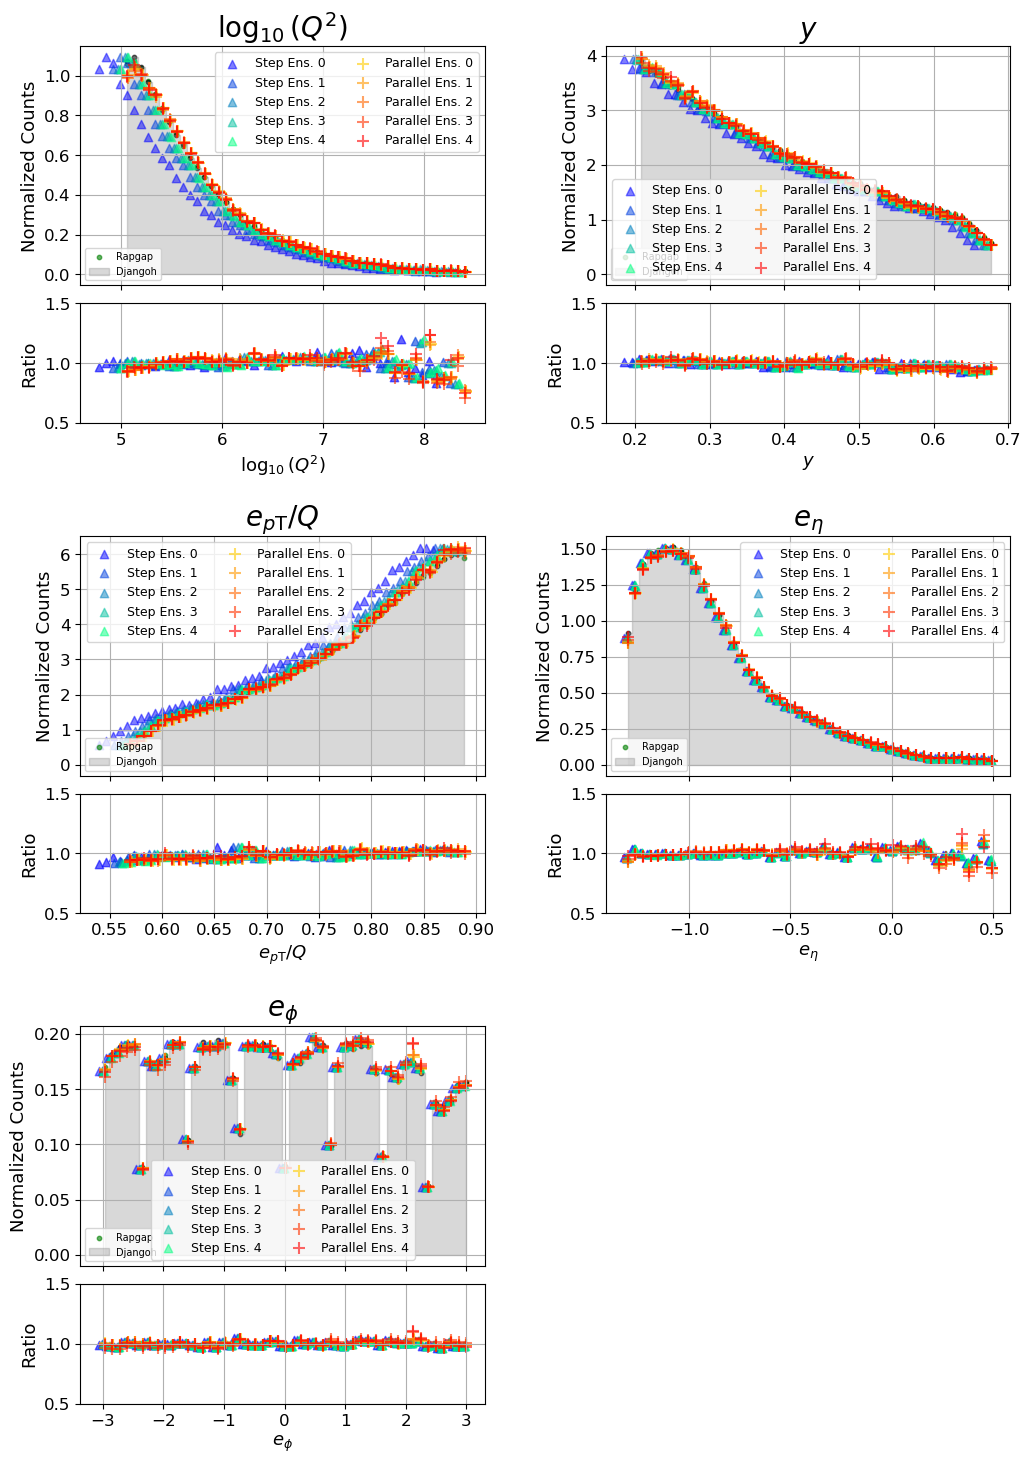

In [20]:
#Plot Distributions
alpha = 0.6
fig = plt.figure(figsize=(12, 24))
outer_gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.3, wspace=0.3) #4rows, 2cols

for j,event_label in enumerate(event_labels):
    
    gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[j], height_ratios=[2, 1], hspace=0.1)

    rapgap = np.load(f'Rapgapevent{j}_ens0_plot_vals.npy')
    djangoh = np.load(f'Djangohevent{j}_ens0_plot_vals.npy')

    x_values, std_devs, ratio_std_devs = get_stdv_from_files(step_files)
    parr_x, parr_std, parr_ratio = get_stdv_from_files(parr_files)

    # Define the subplots; top plot takes up 3 parts, bottom plot takes up 1 part
    ax1 = fig.add_subplot(gs[:1, 0])  # This is the top subplot
    ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)   # This is the bottom subplot
    
    r_scatter = ax1.scatter(rapgap[0], rapgap[1], marker='o', linestyle='-',label='Rapgap',alpha=alpha,s=10,color='g')
    d_scatter = ax1.scatter(djangoh[0], djangoh[1], marker='o', linestyle='-',label='Djangoh',alpha=alpha,s=10,color='k')
    d_scatter = ax1.fill_between(djangoh[0], djangoh[1], step='mid', color='gray', alpha=0.3,label='Djangoh')
    first_legend = ax1.legend(handles=[r_scatter, d_scatter],loc='lower left',fontsize=7)
    ax1.add_artist(first_legend)

    
    ax1.set_title(f'{event_label}',fontsize=20)
    ax1.set_ylabel('Normalized Counts',fontsize=13)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.grid(True)
    plt.setp(ax1.get_xticklabels(), visible=False)

    #ax2.scatter(rapgap[0], rapgap[2], marker='o', linestyle='-',label='Rapgap',alpha=0.5)
    #ax2.scatter(rapgap[0], djangoh[2], marker='o', linestyle='-',label='Djangoh',alpha=0.5)
    ax2.set_ylabel(r'Ratio',fontsize=13)
    ax2.set_xlabel(f'{event_label}',fontsize=13)
    ax2.set_ylim(0.5,1.5)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    ax2.grid(True)

    handles = []

    for n in range(N_Ensemble):
        step_data = np.load(f'Rapgap_unfolded{n}event{j}_ens{n}_plot_vals.npy')        
        step_shift = max(step_data[0])/len(step_data)/10/(n+1)
        handles.append(ax1.scatter(step_data[0]-step_shift, step_data[1], marker='^', color=step_colors[n], alpha=alpha-0.1, linestyle='-',label=f'Step Ens. {n}'))
        ax2.scatter(step_data[0]-step_shift, step_data[2], marker='^', color=step_colors[n], alpha=alpha, linestyle='-',label=f'Step Ens. {n}')

    for n in range(N_Ensemble):
        par_data = np.load(f'{par_dir}/Rapgap_unfolded{n}event{j}_ens{n}_plot_vals.npy')
        par_shift = max(par_data[0])/len(par_data[0])/10/(n+1)
        handles.append(ax1.scatter(par_data[0]+par_shift, par_data[1], marker='+',s=80, color=par_colors[n], alpha=alpha, linestyle='-',label=f'Parallel Ens. {n}'))
        ax2.scatter(par_data[0]+par_shift, par_data[2], marker='+', s=80, color = par_colors[n], alpha=alpha, linestyle='-',label=f'Parallel Ens. {n}')


    ax1.legend(handles=handles,ncol=2,fontsize=9)



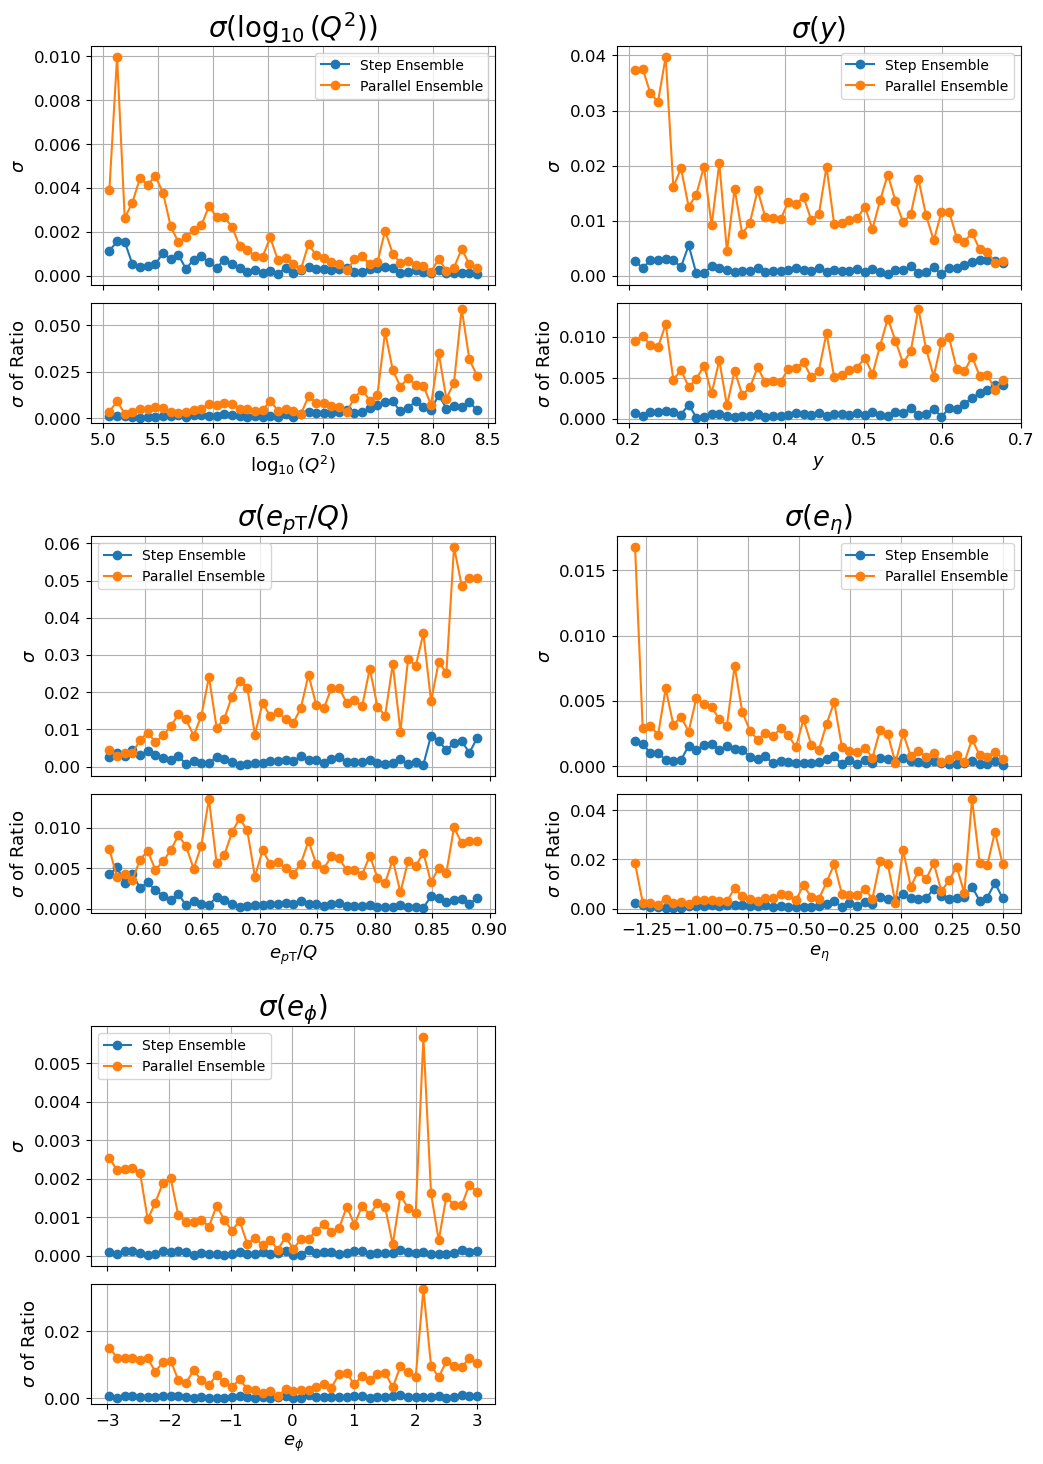

In [19]:

fig = plt.figure(figsize=(12, 24))
outer_gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.3, wspace=0.3) #4rows, 2cols

for j,event_label in enumerate(event_labels):
    
    gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[j], height_ratios=[2, 1], hspace=0.1)

    step_files = glob.glob(f'Rapgap_unfolded[0-4]event{j}_ens[0-4]_plot_vals.npy')
    parr_files = glob.glob(f'{par_dir}/Rapgap_unfolded[0-4]event{j}_ens[0-4]_plot_vals.npy')    

    x_values, std_devs, ratio_std_devs = get_stdv_from_files(step_files)
    parr_x, parr_std, parr_ratio = get_stdv_from_files(parr_files)
    
    # Define the subplots; top plot takes up 3 parts, bottom plot takes up 1 part
    ax1 = fig.add_subplot(gs[:1, 0])  # This is the top subplot
    ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)   # This is the bottom subplot
    
    ax1.plot(x_values, std_devs, marker='o', linestyle='-',label='Step Ensemble')
    ax1.plot(parr_x, parr_std, marker='o', linestyle='-',label='Parallel Ensemble')
    ax1.set_title(f'$\sigma$({event_label})',fontsize=20)
    ax1.set_ylabel('$\sigma$',fontsize=13)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend()
    ax1.grid(True)
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2.plot(x_values, ratio_std_devs, marker='o', linestyle='-',label='Step Ensemble')
    ax2.plot(parr_x, parr_ratio, marker='o', linestyle='-',label='Parallel Ensemble')
    ax2.set_ylabel(r'$\sigma$ of Ratio',fontsize=13)
    ax2.set_xlabel(f'{event_label}',fontsize=13)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    ax2.grid(True)




## Particles

In [22]:
particle_labels = [
    '$\eta_p - \eta_e$',
    '$\phi_p-\phi_e-\pi$',
    '$\log_{10}(p_\mathrm{T})$',
    '$\log_{10}(p_\mathrm{T}/Q)$',
    '$\log_{10}(E/Q)$',
    '$\log_{10}(E)$',
    '$\sqrt{(\eta_p-\eta_e)^2+(\phi_p-\phi_e)^2}$',
    '$\mathrm{Charge}$']

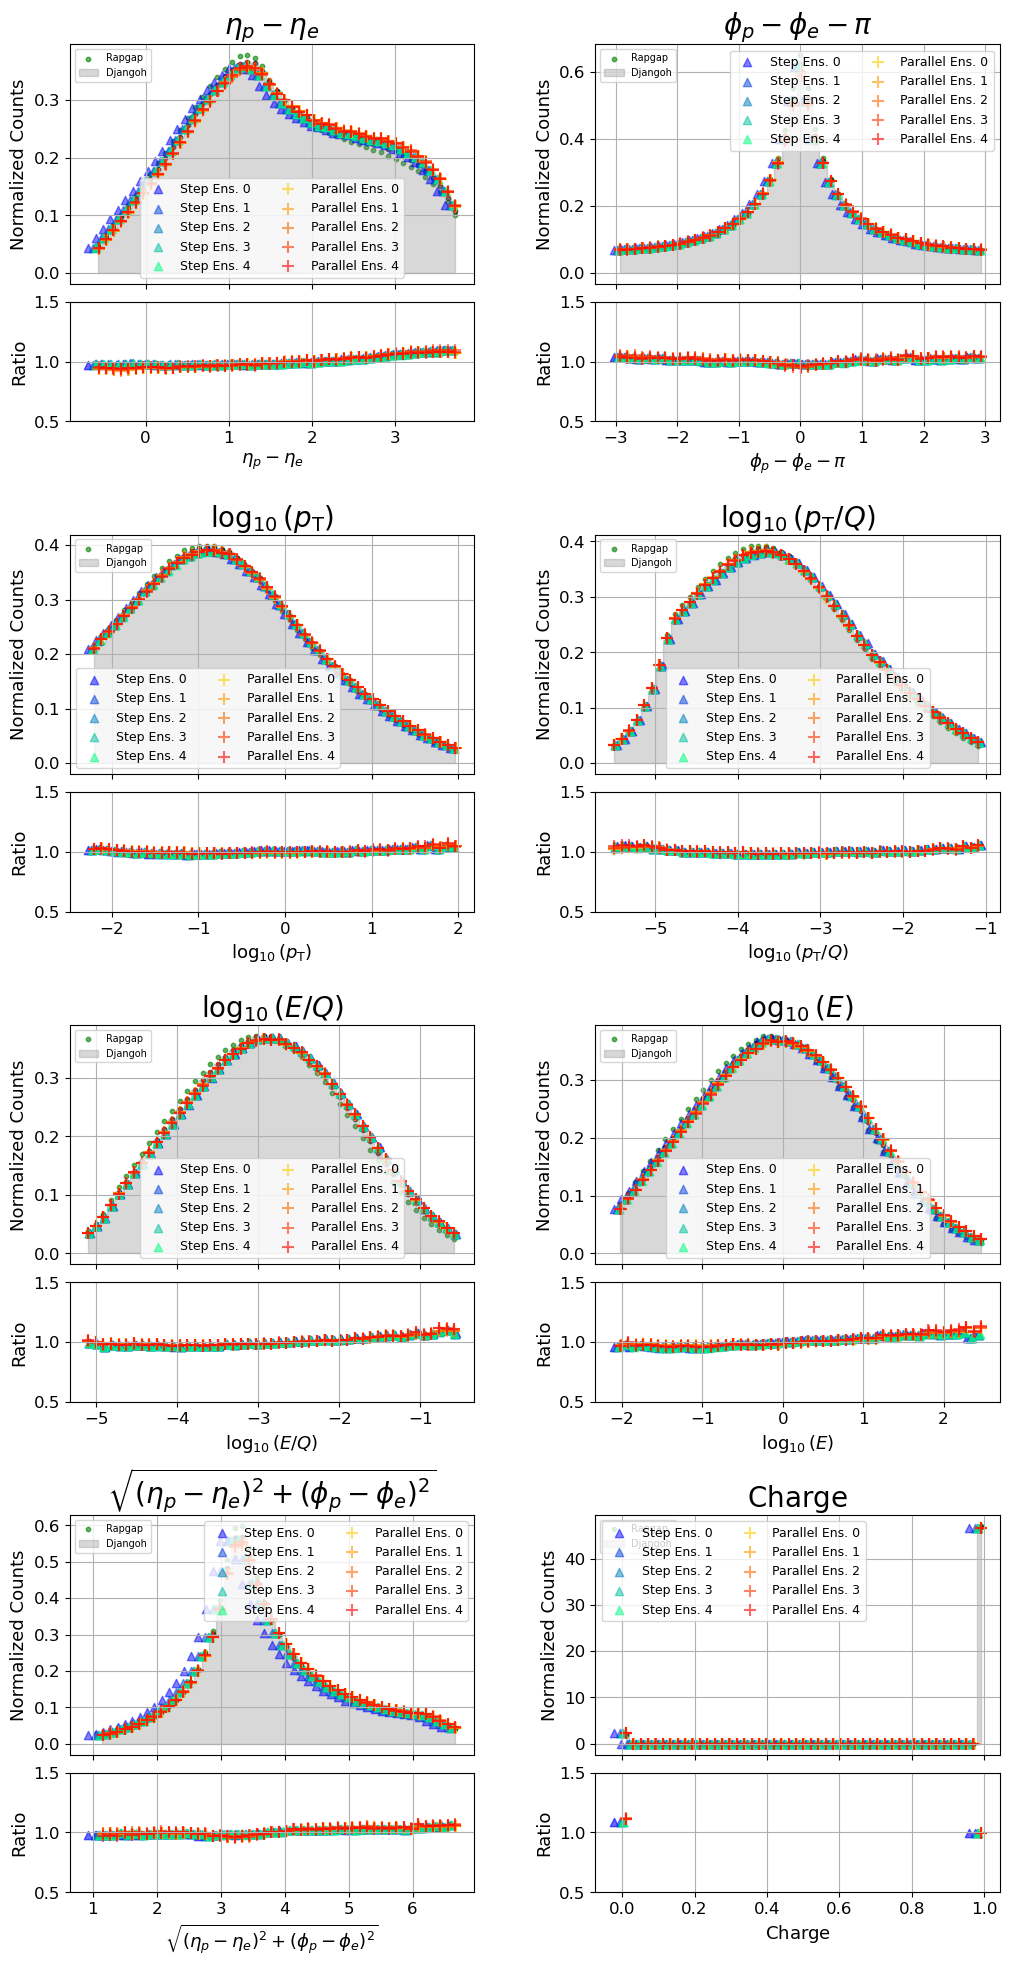

In [23]:
#Plot Distributions
alpha = 0.6
fig = plt.figure(figsize=(12, 24))
outer_gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.3, wspace=0.3) #4rows, 2cols

for j,particle_label in enumerate(particle_labels):
    
    gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[j], height_ratios=[2, 1], hspace=0.1)

    rapgap = np.load(f'Rapgapparticle{j}_ens0_plot_vals.npy')
    djangoh = np.load(f'Djangohparticle{j}_ens0_plot_vals.npy')

    x_values, std_devs, ratio_std_devs = get_stdv_from_files(step_files)
    parr_x, parr_std, parr_ratio = get_stdv_from_files(parr_files)

    # Define the subplots; top plot takes up 3 parts, bottom plot takes up 1 part
    ax1 = fig.add_subplot(gs[:1, 0])  # This is the top subplot
    ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)   # This is the bottom subplot
    
    r_scatter = ax1.scatter(rapgap[0], rapgap[1], marker='o', linestyle='-',label='Rapgap',alpha=alpha,s=10,color='g')
    d_scatter = ax1.scatter(djangoh[0], djangoh[1], marker='o', linestyle='-',label='Djangoh',alpha=alpha,s=10,color='k')
    d_scatter = ax1.fill_between(djangoh[0], djangoh[1], step='mid', color='gray', alpha=0.3,label='Djangoh')
    first_legend = ax1.legend(handles=[r_scatter, d_scatter],loc='upper left',fontsize=7)
    ax1.add_artist(first_legend)

    
    ax1.set_title(f'{particle_label}',fontsize=20)
    ax1.set_ylabel('Normalized Counts',fontsize=13)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.grid(True)
    plt.setp(ax1.get_xticklabels(), visible=False)

    #ax2.scatter(rapgap[0], rapgap[2], marker='o', linestyle='-',label='Rapgap',alpha=0.5)
    #ax2.scatter(rapgap[0], djangoh[2], marker='o', linestyle='-',label='Djangoh',alpha=0.5)
    ax2.set_ylabel(r'Ratio',fontsize=13)
    ax2.set_xlabel(f'{particle_label}',fontsize=13)
    ax2.set_ylim(0.5,1.5)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    ax2.grid(True)

    handles = []

    for n in range(N_Ensemble):
        step_data = np.load(f'Rapgap_unfolded{n}particle{j}_ens{n}_plot_vals.npy')        
        step_shift = max(step_data[0])/len(step_data)/10/(n+1)
        handles.append(ax1.scatter(step_data[0]-step_shift, step_data[1], marker='^', color=step_colors[n], alpha=alpha-0.1, linestyle='-',label=f'Step Ens. {n}'))
        ax2.scatter(step_data[0]-step_shift, step_data[2], marker='^', color=step_colors[n], alpha=alpha, linestyle='-',label=f'Step Ens. {n}')

    for n in range(N_Ensemble):
        par_data = np.load(f'{par_dir}/Rapgap_unfolded{n}particle{j}_ens{n}_plot_vals.npy')
        par_shift = max(par_data[0])/len(par_data[0])/10/(n+1)
        handles.append(ax1.scatter(par_data[0]+par_shift, par_data[1], marker='+',s=80, color=par_colors[n], alpha=alpha, linestyle='-',label=f'Parallel Ens. {n}'))
        ax2.scatter(par_data[0]+par_shift, par_data[2], marker='+', s=80, color = par_colors[n], alpha=alpha, linestyle='-',label=f'Parallel Ens. {n}')


    ax1.legend(handles=handles,ncol=2,fontsize=9)



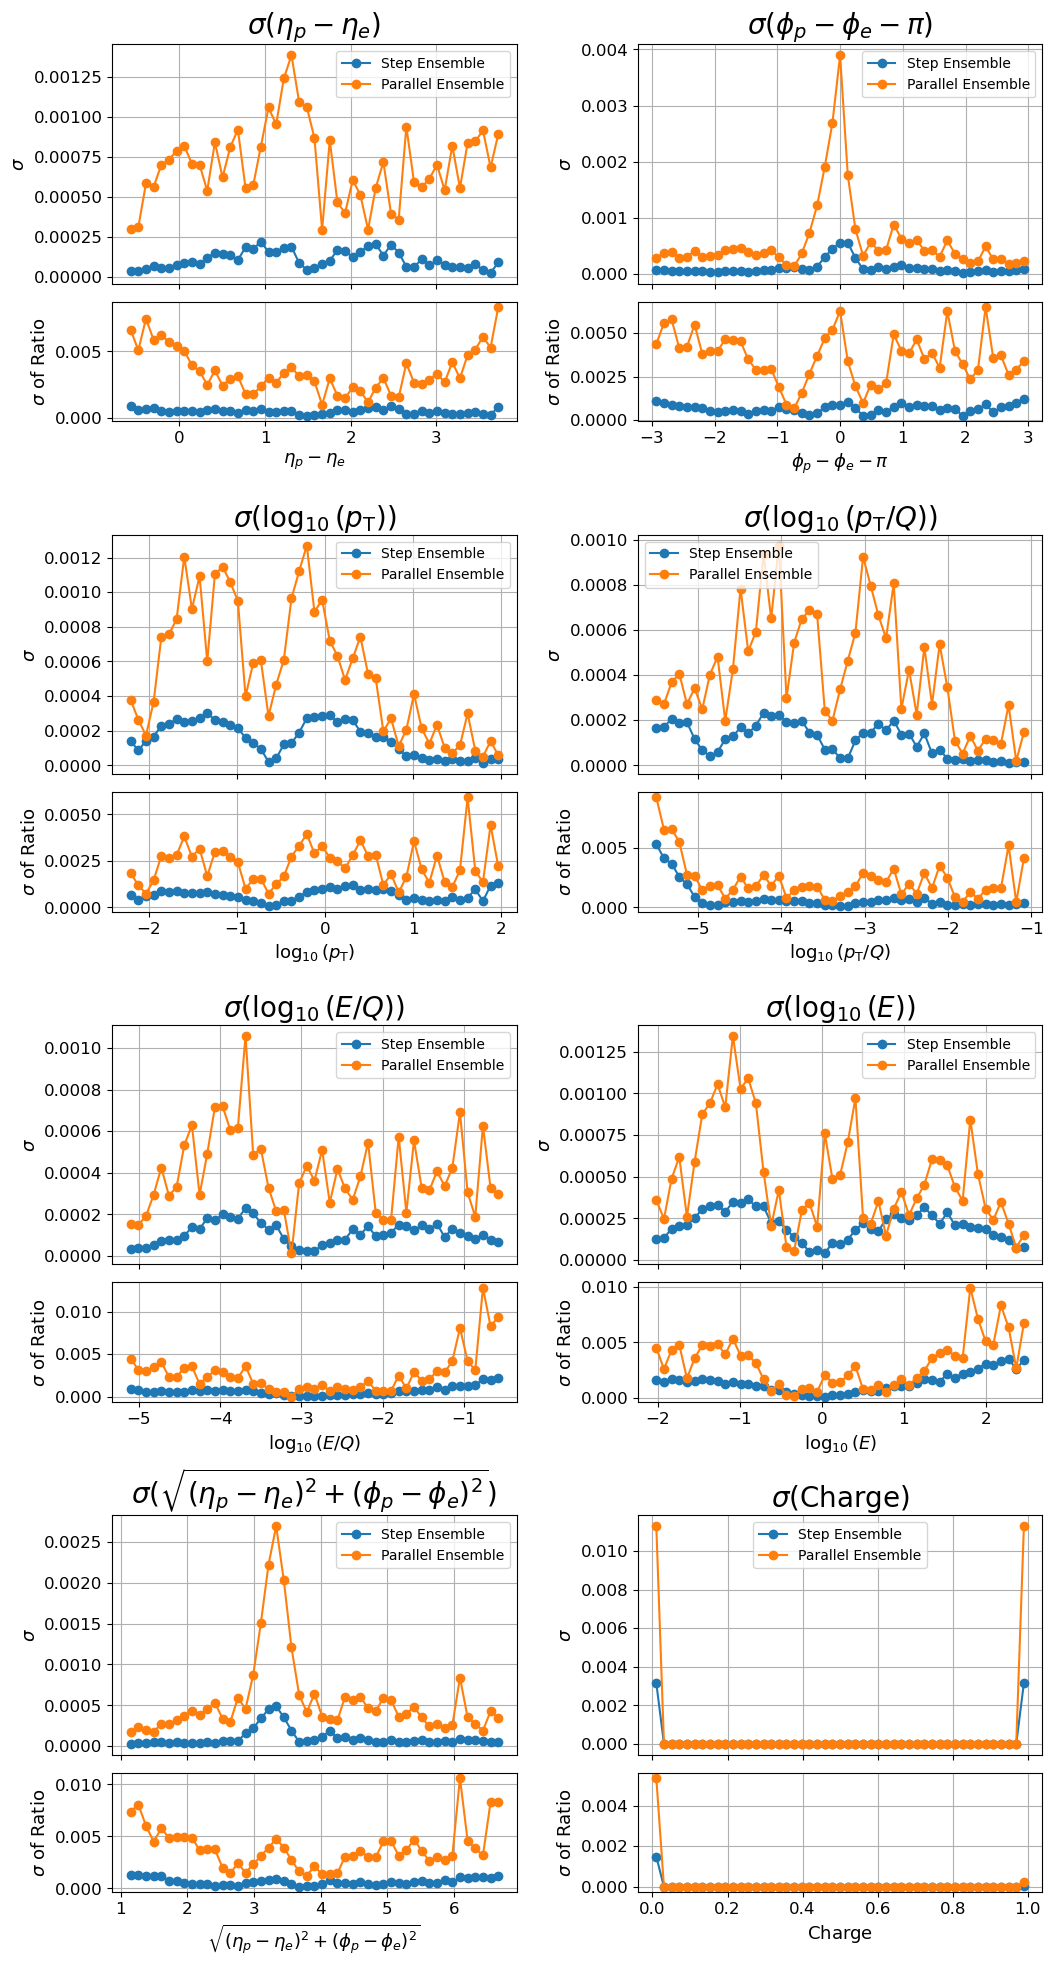

In [24]:
fig = plt.figure(figsize=(12, 24))
outer_gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.3, wspace=0.3) #4rows, 2cols

for j,particle_label in enumerate(particle_labels):
    
    gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[j], height_ratios=[2, 1], hspace=0.1)

    step_files = glob.glob(f'Rapgap_unfolded[0-4]particle{j}_ens[0-4]_plot_vals.npy')
    parr_files = glob.glob(f'{par_dir}/Rapgap_unfolded[0-4]particle{j}_ens[0-4]_plot_vals.npy')    

    x_values, std_devs, ratio_std_devs = get_stdv_from_files(step_files)
    parr_x, parr_std, parr_ratio = get_stdv_from_files(parr_files)
    
    # Define the subplots; top plot takes up 3 parts, bottom plot takes up 1 part
    ax1 = fig.add_subplot(gs[:1, 0])  # This is the top subplot
    ax2 = fig.add_subplot(gs[1, 0],sharex=ax1)   # This is the bottom subplot
    
    ax1.plot(x_values, std_devs, marker='o', linestyle='-',label='Step Ensemble')
    ax1.plot(parr_x, parr_std, marker='o', linestyle='-',label='Parallel Ensemble')
    ax1.set_title(f'$\sigma$({particle_label})',fontsize=20)
    ax1.set_ylabel('$\sigma$',fontsize=13)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend()
    ax1.grid(True)
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2.plot(x_values, ratio_std_devs, marker='o', linestyle='-',label='Step Ensemble')
    ax2.plot(parr_x, parr_ratio, marker='o', linestyle='-',label='Parallel Ensemble')
    ax2.set_ylabel(r'$\sigma$ of Ratio',fontsize=13)
    ax2.set_xlabel(f'{particle_label}',fontsize=13)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    ax2.grid(True)
